In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# creating  dataset in pandas:

# first_formant values roughly calculated from Hillenbrand et al., 1994
  # https://homepages.wmich.edu/~hillenbr/Papers/HillenbrandGettyClarkWheeler.pdf page 6:
  # image also Figure 2 in Jacobs et al., 1994 (Adaptive Mixtures of Local Experts)
  # Using 150 instances of each sound

first_formant_a = np.random.randint(low=650,high=1150, size=150)
first_formant_A = np.random.randint(low=530,high=880, size=150)
first_formant_i = np.random.randint(low=300,high=500, size=150)
first_formant_I = np.random.randint(low=375,high=550, size=150)

# divided by 1000 in keeping with Local Experts paper:
first_formant_a = first_formant_a/1000
first_formant_A = first_formant_A/1000
first_formant_i = first_formant_i/1000
first_formant_I = first_formant_I/1000

# second_formant values roughly calculated:
second_formant_a = np.random.randint(low=1120,high=1800, size=150)
second_formant_A = np.random.randint(low=1020,high=1610, size=150)
second_formant_i = np.random.randint(low=2100,high=3400, size=150)
second_formant_I = np.random.randint(low=1810,high=2790, size=150)


second_formant_a = second_formant_a/1000
second_formant_A = second_formant_A/1000
second_formant_i = second_formant_i/1000
second_formant_I = second_formant_I/1000

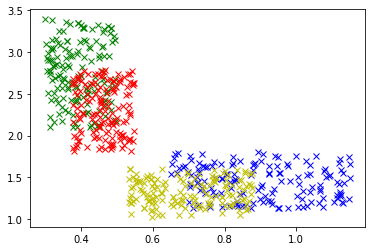

In [3]:
# plot it
plt.plot(first_formant_a, second_formant_a, 'bx')
plt.plot(first_formant_A, second_formant_A, 'yx')
plt.plot(first_formant_i, second_formant_i, 'gx')
plt.plot(first_formant_I, second_formant_I, 'rx')

In [4]:
# # create data:

first_formant = np.append(first_formant_a, first_formant_A)
first_formant = np.append(first_formant, first_formant_i)
first_formant = np.append(first_formant, first_formant_I)


second_formant = np.append(second_formant_a, second_formant_A)
second_formant = np.append(second_formant, second_formant_i)
second_formant = np.append(second_formant, second_formant_I)


# create target data:
target_a = np.full((150,), "a")
target_A = np.full((150,), "A")
target_i = np.full((150,), "i")
target_I = np.full((150,), "I")

target = np.append(target_a, target_A)
target = np.append(target, target_i)
target = np.append(target, target_I)

target = np.array(target)
target


# create data:
formant_df = pd.DataFrame(data=[first_formant, second_formant, target])

# sideways for some reason:
formant_df = formant_df.T

# name cols:
formant_df.columns = ['first formant', 'second formant', 'target']
formant_df



,first formant,second formant,target
0,0.842,1.293,a
1,0.793,1.137,a
2,0.923,1.534,a
3,0.823,1.746,a
4,0.939,1.359,a
...,...,...,...
595,0.456,2.77,I
596,0.532,2.738,I
597,0.39,1.889,I
598,0.456,2.397,I


In [18]:
# train-test split:

# as they're in no particular order, can just split at last 20%:

train_X, test_X = train_test_split(formant_df, test_size=0.2)

# make target data:
train_y = train_X['target']
test_y = test_X['target']

dummy_col_train = pd.get_dummies(train_X['target'])
dummy_col_test = pd.get_dummies(test_X['target'])

# one-hot encoding output data:
new_train_y = np.array(dummy_col_train)
new_test_y = np.array(dummy_col_test)

# drop target column from x data:
train_X = train_X.drop(columns=['target'])
test_X = test_X.drop(columns=['target'])


# convert both X and target data to numpy arrays:
train_X = np.array(train_X)
test_X = np.array(test_X)

train_y = np.array(train_y)
test_y = np.array(test_y)


train_X = np.asarray(train_X).astype(np.float32)
test_X = np.asarray(test_X).astype(np.float32)

new_train_y

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [19]:

# first control model described in the paper (one hidden layer 4 units):

# Build the model.
model = Sequential([
  Dense(4, activation='relu', input_shape=(480,2)),
  Dense(4, activation='sigmoid'),

])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_X,
  new_train_y,
  epochs=300,
  batch_size=16,
)

Epoch 1/300
30/30 [==============================] - 0s 956us/step - loss: 1.3829 - accuracy: 0.2313
Epoch 2/300
30/30 [==============================] - 0s 892us/step - loss: 1.3710 - accuracy: 0.2313
Epoch 3/300
30/30 [==============================] - 0s 912us/step - loss: 1.3603 - accuracy: 0.2313
Epoch 4/300
30/30 [==============================] - 0s 1ms/step - loss: 1.3516 - accuracy: 0.2313
Epoch 5/300
30/30 [==============================] - 0s 923us/step - loss: 1.3434 - accuracy: 0.2313
Epoch 6/300
30/30 [==============================] - 0s 915us/step - loss: 1.3359 - accuracy: 0.2313
Epoch 7/300
30/30 [==============================] - 0s 923us/step - loss: 1.3288 - accuracy: 0.2313
Epoch 8/300
30/30 [==============================] - 0s 961us/step - loss: 1.3220 - accuracy: 0.2313
Epoch 9/300
30/30 [==============================] - 0s 932us/step - loss: 1.3154 - accuracy: 0.2313
Epoch 10/300
30/30 [==============================] - 0s 932us/step - loss: 1.3083 - accuracy

In [20]:
# testing first model:

model.evaluate(
  test_X,
  new_test_y
)

4/4 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.5667


[0.6641600131988525, 0.5666666626930237]

In [21]:
# second control model described in the paper (one hidden layer 8 units):


# making and training simple 1 hidden layer backprop network:

# Build the model.
model2 = Sequential([
  Dense(8, activation='relu', input_shape=(480,2)),
  Dense(4, activation='sigmoid'),
])

# Compile the model.
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model2.fit(
  train_X,
  new_train_y,
  epochs=300,
  batch_size=16,
)

Epoch 1/300
30/30 [==============================] - 0s 947us/step - loss: 1.4132 - accuracy: 0.1396
Epoch 2/300
30/30 [==============================] - 0s 989us/step - loss: 1.4020 - accuracy: 0.1500
Epoch 3/300
30/30 [==============================] - 0s 1ms/step - loss: 1.3933 - accuracy: 0.1375
Epoch 4/300
30/30 [==============================] - 0s 989us/step - loss: 1.3849 - accuracy: 0.1292
Epoch 5/300
30/30 [==============================] - 0s 920us/step - loss: 1.3760 - accuracy: 0.0833
Epoch 6/300
30/30 [==============================] - 0s 886us/step - loss: 1.3659 - accuracy: 0.1437
Epoch 7/300
30/30 [==============================] - 0s 917us/step - loss: 1.3542 - accuracy: 0.1979
Epoch 8/300
30/30 [==============================] - 0s 960us/step - loss: 1.3392 - accuracy: 0.2771
Epoch 9/300
30/30 [==============================] - 0s 908us/step - loss: 1.3232 - accuracy: 0.2750
Epoch 10/300
30/30 [==============================] - 0s 913us/step - loss: 1.3080 - accuracy

In [22]:
# testing second model:

model2.evaluate(
  test_X,
  new_test_y
)

4/4 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.6917


[0.5590284466743469, 0.6916666626930237]

In [10]:
new_test_y[0:10]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [11]:
# just visually comparing expected to results:

predictions = model2.predict(test_X)

# iterate through results, convert largest in each sample to 1 and smallest to 0

# convert predictions and the samples inside it from np to list so we can use index fxn:
predictions2 = list(predictions)
for i in range(len(predictions2)):
  predictions2[i] = list(predictions2[i])


for sample in predictions2:
  # change max predicted value to 1 as sigmoid is returning prob, so highest prob is 1
  sample[(sample.index(max(sample)))] = 1

for i in range(len(predictions2)):
  for j in range(len(sample)):
    if predictions2[i][j] != 1:
      predictions2[i][j] = 0


predictions2[0:10]
# compare these predictions to actual in previous cell

[[0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1]]

## **PROBABILITY MODEL BELOW:**

In [12]:
# supress tensorflow warnings:
import os
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


# matrix of probabilities to be updated:
prob_matrix = {'p_ex_1_a': 0.5,'p_ex_1_A': 0.5,'p_ex_1_i': 0.5,'p_ex_1_I': 0.5,
               'p_ex_2_a': 0.5,'p_ex_2_A': 0.5,'p_ex_2_i': 0.5,'p_ex_2_I': 0.5,
               'p_ex_3_a': 0.5,'p_ex_3_A': 0.5,'p_ex_3_i': 0.5,'p_ex_3_I': 0.5,
               'p_ex_4_a': 0.5,'p_ex_4_A': 0.5,'p_ex_4_i': 0.5,'p_ex_4_I': 0.5}

# probability change function:
def prob_change(p, E_avg, target, y_i):
  d_p = p*((E_avg**2)-(target-y_i)**2)
  return d_p

prob_matrix

{'p_ex_1_A': 0.5,
 'p_ex_1_I': 0.5,
 'p_ex_1_a': 0.5,
 'p_ex_1_i': 0.5,
 'p_ex_2_A': 0.5,
 'p_ex_2_I': 0.5,
 'p_ex_2_a': 0.5,
 'p_ex_2_i': 0.5,
 'p_ex_3_A': 0.5,
 'p_ex_3_I': 0.5,
 'p_ex_3_a': 0.5,
 'p_ex_3_i': 0.5,
 'p_ex_4_A': 0.5,
 'p_ex_4_I': 0.5,
 'p_ex_4_a': 0.5,
 'p_ex_4_i': 0.5}

In [23]:

# define the expert model architectures:
  # define the models to only take one sampmle at a time:
expert_1 = Sequential([
  Dense(8, activation='relu', input_shape=(1,2)),
  Dense(4, activation='sigmoid'),
])

expert_2 = Sequential([
  Dense(8, activation='relu', input_shape=(1,2)),
  Dense(4, activation='sigmoid'),
])

expert_3 = Sequential([
  Dense(8, activation='relu', input_shape=(1,2)),
  Dense(4, activation='sigmoid'),
])

expert_4 = Sequential([
  Dense(8, activation='relu', input_shape=(1,2)),
  Dense(4, activation='sigmoid'),
])

In [24]:
# split up training data into one-sample slices:
# loop through training data:

num_epochs = 1 

# outer loop determines how many times to run over entire dataset:
for j in range(num_epochs):
  # inner loop iterates over each sample:
  for i in range(len(train_X)):
    

  ## EXPERT 1:
    # compile model:
    expert_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

    # learning rate reset every time compiles if not on first sample:
    # change learning rates to match probs in matrix:
    if i !=0:
      # don't change for first iteration
      # change class "a" learning rates to match probs in matrix:
      if new_train_y[i][0] == 1:
        expert_1.optimizer.lr = past_learning_rate_ex_1+prob_matrix['p_ex_1_a']
        expert_2.optimizer.lr = past_learning_rate_ex_2+prob_matrix['p_ex_2_a']
        expert_3.optimizer.lr = past_learning_rate_ex_3+prob_matrix['p_ex_3_a']
        expert_4.optimizer.lr = past_learning_rate_ex_4+prob_matrix['p_ex_4_a']

      # change class "A" learning rates to match probs in matrix:
      if new_train_y[i][1] == 1:
        expert_1.optimizer.lr = past_learning_rate_ex_1+prob_matrix['p_ex_1_A']
        expert_2.optimizer.lr = past_learning_rate_ex_2+prob_matrix['p_ex_2_A']
        expert_3.optimizer.lr = past_learning_rate_ex_3+prob_matrix['p_ex_3_A']
        expert_4.optimizer.lr = past_learning_rate_ex_4+prob_matrix['p_ex_4_A']

      # change class "i" learning rates to match probs in matrix:
      if new_train_y[i][2] == 1:
        expert_1.optimizer.lr = past_learning_rate_ex_1+prob_matrix['p_ex_1_i']
        expert_2.optimizer.lr = past_learning_rate_ex_2+prob_matrix['p_ex_2_i']
        expert_3.optimizer.lr = past_learning_rate_ex_3+prob_matrix['p_ex_3_i']
        expert_4.optimizer.lr = past_learning_rate_ex_4+prob_matrix['p_ex_4_i']

      # change class "I" learning rates to match probs in matrix:
      if new_train_y[i][3] == 1:
        expert_1.optimizer.lr = past_learning_rate_ex_1+prob_matrix['p_ex_1_I']
        expert_2.optimizer.lr = past_learning_rate_ex_2+prob_matrix['p_ex_2_I']
        expert_3.optimizer.lr = past_learning_rate_ex_3+prob_matrix['p_ex_3_I']
        expert_4.optimizer.lr = past_learning_rate_ex_4+prob_matrix['p_ex_4_I']

    # need to format training data like this for keras to acccept sample shape:
    print('training expert_1')
    print('\n')
    expert_1_history = expert_1.fit(
      np.array([train_X[i]]),
      np.array([new_train_y[i]]),
      epochs=1,
      batch_size=128,
    )

    ex_1_pred = expert_1.predict(np.array([train_X[i]]))


    

  ## EXPERT 2:
      # compile model:
    expert_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

    print('training expert_2')
    print('\n')
    # Train the model.
    expert_2_history = expert_2.fit(
      np.array([train_X[i]]),
      np.array([new_train_y[i]]),
      epochs=1,
      batch_size=128,
    )

    ex_2_pred = expert_2.predict(np.array([train_X[i]]))




  ## EXPERT 3:
      # compile model:
    expert_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

    # Train the model.
    print('training expert_3')
    print('\n')
    expert_3_history = expert_3.fit(
      np.array([train_X[i]]),
      np.array([new_train_y[i]]),
      epochs=1,
      batch_size=128,
    )

    ex_3_pred = expert_3.predict(np.array([train_X[i]]))




  ## EXPERT 4:
      # compile model:
    expert_4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

    # Train the model.
    print('training expert_4')
    print('\n')
    expert_4_history = expert_4.fit(
    np.array([train_X[i]]),
    np.array([new_train_y[i]]),
      epochs=1,
      batch_size=128,
    )

    ex_4_pred = expert_4.predict(np.array([train_X[i]]))

    # save current learning rate for next iteration for all experts:
    past_learning_rate_ex_1 = expert_1.optimizer.lr
    past_learning_rate_ex_2 = expert_2.optimizer.lr
    past_learning_rate_ex_3 = expert_3.optimizer.lr
    past_learning_rate_ex_4 = expert_4.optimizer.lr


    # "a" CLASS WEIGHT UPDATES:
    if new_train_y[i][0] == 1:

      ex_1_error_sq = (new_train_y[i][0]-ex_1_pred[0][0])**2
      ex_2_error_sq = (new_train_y[i][0]-ex_2_pred[0][0])**2
      ex_3_error_sq = (new_train_y[i][0]-ex_3_pred[0][0])**2
      ex_4_error_sq = (new_train_y[i][0]-ex_4_pred[0][0])**2

      # average error
      E_avg = (ex_1_error_sq + ex_2_error_sq + ex_3_error_sq + ex_4_error_sq)/4

      prob_matrix['p_ex_1_a'] = prob_matrix['p_ex_1_a'] + prob_change(prob_matrix['p_ex_1_a'], E_avg, new_train_y[i][0], ex_1_pred[0][0])
      prob_matrix['p_ex_2_a'] = prob_matrix['p_ex_2_a'] + prob_change(prob_matrix['p_ex_2_a'], E_avg, new_train_y[i][0], ex_2_pred[0][0])
      prob_matrix['p_ex_3_a'] = prob_matrix['p_ex_3_a'] + prob_change(prob_matrix['p_ex_3_a'], E_avg, new_train_y[i][0], ex_3_pred[0][0])
      prob_matrix['p_ex_4_a'] = prob_matrix['p_ex_4_a'] + prob_change(prob_matrix['p_ex_4_a'], E_avg, new_train_y[i][0], ex_4_pred[0][0])
      # this update function sucks but it runs!!! so let's go


    # "A" CLASS PROBABILITY UPDATES:
    elif new_train_y[i][1] == 1:

      ex_1_error_sq = (new_train_y[i][1]-ex_1_pred[0][1])**2
      ex_2_error_sq = (new_train_y[i][1]-ex_2_pred[0][1])**2
      ex_3_error_sq = (new_train_y[i][1]-ex_3_pred[0][1])**2
      ex_4_error_sq = (new_train_y[i][1]-ex_4_pred[0][1])**2

      # average error
      E_avg = (ex_1_error_sq + ex_2_error_sq + ex_3_error_sq + ex_4_error_sq)/4
      prob_matrix['p_ex_1_A'] = prob_matrix['p_ex_1_A'] + prob_change(prob_matrix['p_ex_1_A'], E_avg, new_train_y[i][1], ex_1_pred[0][1])
      prob_matrix['p_ex_2_A'] = prob_matrix['p_ex_2_A'] + prob_change(prob_matrix['p_ex_2_A'], E_avg, new_train_y[i][1], ex_2_pred[0][1])
      prob_matrix['p_ex_3_A'] = prob_matrix['p_ex_3_A'] + prob_change(prob_matrix['p_ex_3_A'], E_avg, new_train_y[i][1], ex_3_pred[0][1])
      prob_matrix['p_ex_4_A'] = prob_matrix['p_ex_4_A'] + prob_change(prob_matrix['p_ex_4_A'], E_avg, new_train_y[i][1], ex_4_pred[0][1])

    # "i" CLASS PROBABILITY UPDATES:
    elif new_train_y[i][2] == 1:

      ex_1_error_sq = (new_train_y[i][2]-ex_1_pred[0][2])**2
      ex_2_error_sq = (new_train_y[i][2]-ex_2_pred[0][2])**2
      ex_3_error_sq = (new_train_y[i][2]-ex_3_pred[0][2])**2
      ex_4_error_sq = (new_train_y[i][2]-ex_4_pred[0][2])**2

      # average error
      E_avg = (ex_1_error_sq + ex_2_error_sq + ex_3_error_sq + ex_4_error_sq)/4
      prob_matrix['p_ex_1_i'] = prob_matrix['p_ex_1_i'] + prob_change(prob_matrix['p_ex_1_i'], E_avg, new_train_y[i][2], ex_1_pred[0][2])
      prob_matrix['p_ex_2_i'] = prob_matrix['p_ex_2_i'] + prob_change(prob_matrix['p_ex_2_i'], E_avg, new_train_y[i][2], ex_2_pred[0][2])
      prob_matrix['p_ex_3_i'] = prob_matrix['p_ex_3_i'] + prob_change(prob_matrix['p_ex_3_i'], E_avg, new_train_y[i][2], ex_3_pred[0][2])
      prob_matrix['p_ex_4_i'] = prob_matrix['p_ex_4_i'] + prob_change(prob_matrix['p_ex_4_i'], E_avg, new_train_y[i][2], ex_4_pred[0][2])


    # "I" CLASS PROBABILITY UPDATES:
    elif new_train_y[i][3] == 1:

      ex_1_error_sq = (new_train_y[i][2]-ex_1_pred[0][3])**2
      ex_2_error_sq = (new_train_y[i][2]-ex_2_pred[0][3])**2
      ex_3_error_sq = (new_train_y[i][2]-ex_3_pred[0][3])**2
      ex_4_error_sq = (new_train_y[i][2]-ex_4_pred[0][3])**2

      prob_matrix['p_ex_1_I'] = prob_matrix['p_ex_1_I'] + prob_change(prob_matrix['p_ex_1_I'], E_avg, new_train_y[i][3], ex_1_pred[0][3])
      prob_matrix['p_ex_2_I'] = prob_matrix['p_ex_2_I'] + prob_change(prob_matrix['p_ex_2_I'], E_avg, new_train_y[i][3], ex_2_pred[0][3])
      prob_matrix['p_ex_3_I'] = prob_matrix['p_ex_3_I'] + prob_change(prob_matrix['p_ex_3_I'], E_avg, new_train_y[i][3], ex_3_pred[0][3])
      prob_matrix['p_ex_4_I'] = prob_matrix['p_ex_4_I'] + prob_change(prob_matrix['p_ex_4_I'], E_avg, new_train_y[i][3], ex_4_pred[0][3])


training expert_1


1/1 [==============================] - 0s 2ms/step - loss: 1.6467 - accuracy: 0.0000e+00
training expert_2


1/1 [==============================] - 0s 1ms/step - loss: 1.7334 - accuracy: 0.0000e+00
training expert_3


1/1 [==============================] - 0s 1ms/step - loss: 0.8569 - accuracy: 1.0000
training expert_4


1/1 [==============================] - 0s 1ms/step - loss: 1.3561 - accuracy: 0.0000e+00
training expert_1


1/1 [==============================] - 0s 1ms/step - loss: 1.1424 - accuracy: 1.0000
training expert_2


1/1 [==============================] - 0s 1ms/step - loss: 1.6475 - accuracy: 0.0000e+00
training expert_3


1/1 [==============================] - 0s 2ms/step - loss: 1.8035 - accuracy: 0.0000e+00
training expert_4


1/1 [==============================] - 0s 1ms/step - loss: 1.3719 - accuracy: 0.0000e+00
training expert_1


1/1 [==============================] - 0s 2ms/step - loss: 2.2431 - accuracy: 0.0000e+00
training expert_2


1/1 [==

KeyboardInterrupt: ignored